- want cooccurance plots for each MCM
- want want to cluster them etc. see notes
- want them for same MCM but different sizes

In [1]:
import numpy as np
import os
import json
import sys
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

sys.path.append("../")
import src.plot as myplot
import seaborn as sns


In [2]:
import importlib
import src.plot as myplot
importlib.reload(myplot)

<module 'src.plot' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/classifier/bin/../src/plot.py'>

In [3]:
# lets first load some example MCM
samples_path = "../OUTPUT/sample_sizes"
fname = "MCMs.json"
# sample_sizes = [10,100,500,1000,5421]
# sample_sizes = np.geomspace(10,5421, 10,dtype=int)
sample_sizes = np.append(np.arange(10, 5421, 100), 5421)
samples = {}
for sample_size in sample_sizes:

        with open(os.path.join(samples_path,str(sample_size), fname), "r") as f:
                samples[sample_size] = json.load(f)

In [4]:
sample_sizes

array([  10,  110,  210,  310,  410,  510,  610,  710,  810,  910, 1010,
       1110, 1210, 1310, 1410, 1510, 1610, 1710, 1810, 1910, 2010, 2110,
       2210, 2310, 2410, 2510, 2610, 2710, 2810, 2910, 3010, 3110, 3210,
       3310, 3410, 3510, 3610, 3710, 3810, 3910, 4010, 4110, 4210, 4310,
       4410, 4510, 4610, 4710, 4810, 4910, 5010, 5110, 5210, 5310, 5410,
       5421])

In [5]:
# def create_cooccurance_matrix(mcm):
#     """
#     Create a co-occurrence matrix based on the given MCMs.

#     :param MCMs: A list or nparray with strings of nr_pixel elements that are either 0 or 1.
#     :type MCMs: list or np.ndarray
#     :return: The ordered co-occurrence matrix.
#     :rtype: np.ndarray
#     """
#     mcm = np.genfromtxt(mcm, delimiter=1, dtype=int)
#     pairs = np.argwhere(mcm == 1).T
#     nr_pixels = len(pairs[0])
#     matrix = np.zeros((nr_pixels, nr_pixels))

#     # fill the groupings into the co-occurrence matrix
#     for icc in np.unique(pairs[0]):
#         pixels = pairs[1][pairs[0] == icc]
#         matrix[np.ix_(pixels, pixels)] = 1
        
#     # cluster MCMs together


#     return matrix

# def do_cluster(matrix, via_matrix=None):
#     """
#     Perform hierarchical clustering on a given matrix.
#     Can provide via_matrix to base the clustering of "matrix" on the dendrogram of "via_matrix". 

#     :param matrix: The input matrix for clustering.
#     :type matrix: numpy.ndarray
#     :param via_matrix: Optional matrix to base the clustering of "matrix" on. Clustering will be performed on "via_matrix" and applied to "matrix".
#     :type return_dendro: numpy.ndarray
#     :return: The clustered matrix
#     :rtype: numpy.ndarray
#     """
    
#     if via_matrix is None:
#         via_matrix = matrix

#     linkage = sch.linkage(via_matrix, method='average')
#     dendrogram = sch.dendrogram(linkage, no_plot=True)
#     return matrix[:, dendrogram['leaves']][dendrogram['leaves']]

In [6]:
# Cooccurance matrix for MCM 0
cmap = myplot.cmap_to_gray("Black", reverse=True)
mcm_0 = [myplot.create_cooccurance_matrix(samples[i][0]) for i in samples]
my_sum = myplot.do_cluster(np.sum(mcm_0,axis=0), mcm_0[-1])

In [7]:

# g = sns.clustermap(my_sum, cmap=cmap, linewidth=1,
#                     edgecolor="white", 
#                     dendrogram_ratio=(1e-10,1e-10), # This line 
#                     figsize=(15,15),
#                     xticklabels=False,
#                     yticklabels=False,
#                     row_cluster=False,
#                     col_cluster=False,
#                     cbar=True,
#                     cbar_pos=(0.85, 0.8, 0.07, 0.15)  # Set the colorbar position to the top right corner
#                     )
# # g.ax_row_dendrogram.remove()
# # g.ax_col_dendrogram.remove()
# # g.ax_heatmap.set_facecolor("gray")

# # g.cax.set_visible(False)
# # g.ax_cbar.set_title("")

# comms_test = myplot.do_cluster(mcm_0[-1],mcm_0[-1])
# borders = myplot.find_borders(comms_test)
# myplot.draw_all_borders(borders,ax=g.ax_heatmap,offset=(.5,.5))

# g.ax_cbar.tick_params(axis='x', length=10)
# for spine in g.ax_cbar.spines:
#     g.ax_cbar.spines[spine].set_color('black')
#     g.ax_cbar.spines[spine].set_linewidth(2)

# plt.savefig("../figures/paper_cooccurance.png")

In [8]:
# calcualte overlap between sample cluastering and final clustering
# -> how many are already in the right cluster
# mcm_0

res = [np.sum(np.logical_and(i, mcm_0[-1])) for i in mcm_0]
res = [i/np.sum(mcm_0[-1]) for i in res]

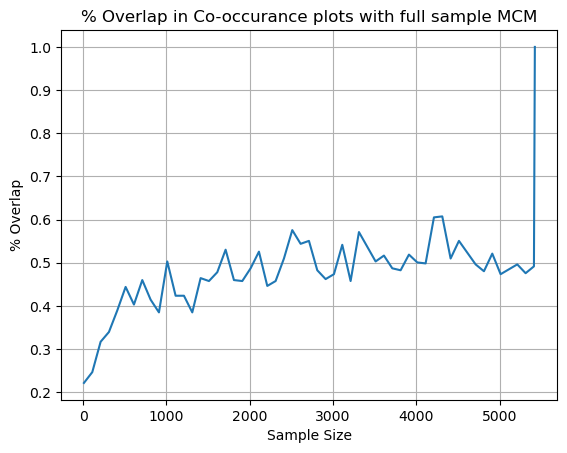

In [9]:
plt.plot(sample_sizes, res)
plt.xlabel('Sample Size')
plt.ylabel('% Overlap')
plt.title("% Overlap in Co-occurance plots with full sample MCM")
plt.grid(True)
plt.show()

Fraction of pixels together in a group that will be in a (possibly differently labeled) group later as well. 

- in the co-occurance matrix, this means that the row will have not a single overlapping pixel. Then, that grouping means that none of the pixels that are together are correct

In [58]:
# comms_0
wrong_pixels

array([ 22,  44,  55, 120])

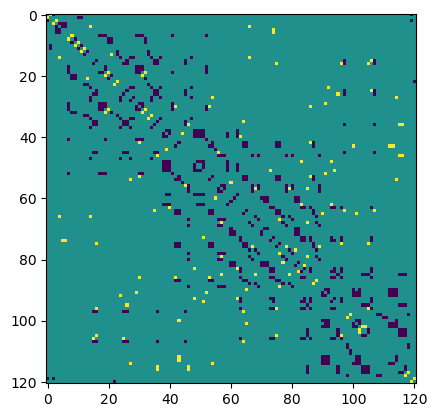

In [67]:
# want the pixels that 

# res = myplot.create_cooccurance_matrix(samples[10][0])
res = (mcm_0[0] - mcm_0[-1])
plt.imshow(res)


In [68]:
# res = myplot.create_cooccurance_matrix(samples[10][0])


array([[15,  0, 15,  5,  5,  5,  5, 12, 17, 17,  0],
       [ 0, 19, 19, 13,  3,  3, 12, 12, 12, 17, 17],
       [16, 19, 13,  3,  3, 13, 13, 12, 12, 12, 17],
       [19, 13,  3,  3, 13, 11, 11, 11, 12, 10, 10],
       [14,  3,  6, 13, 11, 11, 11, 11, 12, 10, 10],
       [14,  6,  6,  6, 11,  8,  8, 11,  4, 10, 10],
       [18,  6, 18,  6,  8,  8,  8,  4,  4, 10, 10],
       [18,  6, 18,  6,  8,  8,  4,  4,  1,  4, 10],
       [18,  6,  2,  2,  2,  4,  4,  1,  4,  3,  9],
       [ 7,  2,  2,  2,  1,  1,  1,  4,  3,  9,  9],
       [ 7,  7,  2,  2,  2,  1,  1,  1,  9, 15, 16]])

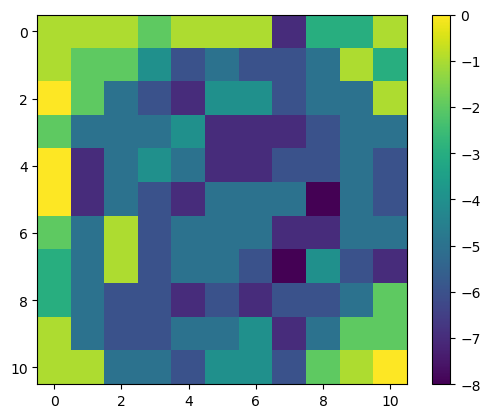

In [91]:
plt.imshow(np.sum(res, axis=0).reshape(11,11))
plt.colorbar()

##### find the rows/pixels that do not have any community members in their community that they will have in the final community



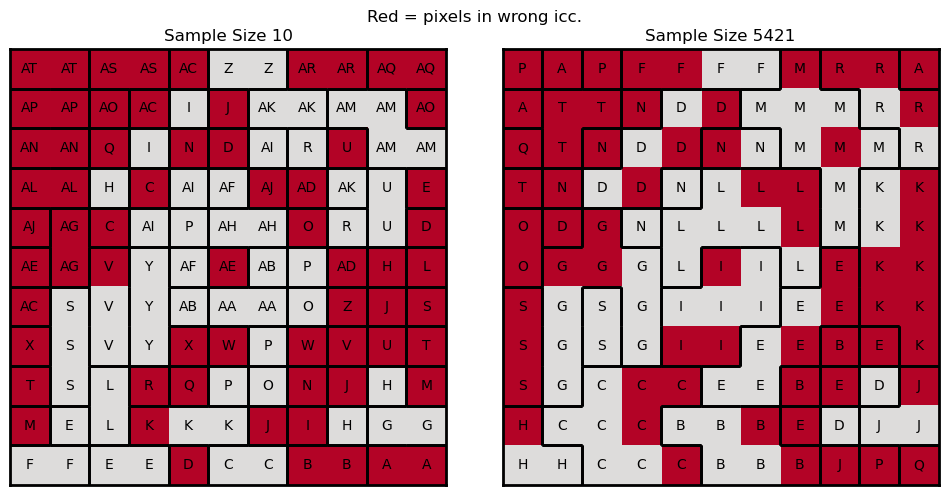

In [112]:
a = mcm_0[0]+mcm_0[-1]
np.fill_diagonal(a, 0)
wrong_pixels = np.where(np.all(a != 2, axis=1))[0]



val = np.zeros(121)
val[wrong_pixels] = 1
val = val.reshape((11,11))

fig, axs = plt.subplots(1, 2, figsize=(10, 5))


plt.suptitle("Red = pixels in wrong icc.")
comms_0 = samples[10][0]
comms_0 = myplot.generate_icc_comms_map(comms_0)
axs[0].set_title('Sample Size 10')
im = myplot.partition_map(axs[0], val, myplot.int_to_letters(comms_0), myplot.find_borders(comms_0), cbar=False)


comms_0 = samples[5421][0]
comms_0 = myplot.generate_icc_comms_map(comms_0)
axs[1].set_title('Sample Size 5421')
im = myplot.partition_map(axs[1], val, myplot.int_to_letters(comms_0), myplot.find_borders(comms_0), cbar=False)

plt.tight_layout()
plt.show()


which communities are wrong in the small dataset compared to the big one. They disappear as the sampe sizes get larger.
that is which pixels are incorrectly grouped
that is which pixels are in an group that should not be together later

Check if all its member pixels are present in any community of the large dataset. 

------------------------------

In [10]:
test_mcm = test_MCMs[0]
test_mcm = np.genfromtxt(test_mcm,delimiter=1,dtype=int)


idx_pairs = np.argwhere(test_mcm==1).T
cooocurance_matrix = np.zeros((121,121))

cooocurance_matrix[idx_pairs[0],idx_pairs[1]] = 1
cooocurance_matrix[idx_pairs[1],idx_pairs[0]] = 1

plt.imshow(cooocurance_matrix)

mcm = np.array(["11000", "00111"],dtype=str)

mcm

NameError: name 'test_MCMs' is not defined